# Determine duration of event following his features 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

## 1 . Purpose of this project and description of the data

We want, with the features we could collected concerning a project to determine his duration. We have several features, some numerical, some categorial.

At first, we will focus on the numerical and Boolean values to check if a pattern could be show off. As we used already done event, we could calculate his duration as a predictive value. For this first part of this project, we will use mainly linear regression to predict the duration.

In the second part, we will use hierarchical classification tree to start to have check the categorial feature and improve our prediction. 

As it is a real project, data are confidential and will be anonymize and features name will be renamed to avoid guessing the real values of this data.

This project, as describe later, will focus only on full completed data.

### 1.2 Data Description

As already explained, data could be described in detail but only type of data. Data coming from our organization. Unfortunately, all features weren’t be completed and we face to missing values. Some features could be used as more than 50 % of values is missing. Also, we could these features in a second part of the project, with classification and by clusters of the data.

We have more than 395 events, but only 93 are fully completed, with 28 features. Data came from a database, and the file is a tabulated csv file.

First, we have 6 features describe the event, it is descriptive and categorical features.

Second, 7 features are duration, 12 are numerical and 3 are Boolean.

The output feature is, also a duration.

## 2. Import Data and Cleaning data

### 2.1 Import Data

We import data from the provided csv file.

In [2]:
df = pd.read_csv("Key_Data_List_anonymous.csv", sep = ';', encoding = 'ISO-8859-1')

### 2.2 Cleaning Data

As data coming from a datbase, there are clean. Except missing value will be managed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   395 non-null    int64  
 1   Feature_2   395 non-null    int64  
 2   Feature_3   395 non-null    int64  
 3   Feature_4   395 non-null    int64  
 4   Feature_5   20 non-null     float64
 5   Feature_6   79 non-null     float64
 6   Feature_7   111 non-null    float64
 7   Feature_8   395 non-null    int64  
 8   Feature_9   395 non-null    int64  
 9   Feature_10  39 non-null     float64
 10  Feature_11  54 non-null     float64
 11  Feature_12  338 non-null    float64
 12  Feature_13  349 non-null    float64
 13  Feature_14  311 non-null    float64
 14  Feature_15  308 non-null    float64
 15  Feature_16  363 non-null    float64
 16  Feature_17  244 non-null    float64
 17  Feature_18  93 non-null     float64
 18  Feature_19  302 non-null    float64
 19  Feature_20  139 non-null    f

* Features 1 to 4 are descriptive, and they are full complete features.
* Features 10 to 15 are duration, most of them are full but must be checked
* Features 24, 25 and 27 are Boolean
* All others features are numerical values

#### 2.2.1 - Cleaning Output Data

First, we will remove all rows without the output values

In [4]:
df_na = df[~df.Output.isna()]

#### 2.2.2 - Cleaning Input Data

We will remove all columns where numners of non_null values are les than 79 as it is not possible to replace these values.

In [5]:
dropped_columns = ['Feature_5', 'Feature_6', 'Feature_7', 'Feature_10',
                   'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14',
                   'Feature_15', 'Feature_16', 'Feature_17']

In [6]:
df_dropped = df_na.drop(dropped_columns, axis = 1)

For the features 19, 20, 79, 23, we will check the histogram.

#### 2.2.4 - Replacing missing Value

We will display histogram to have a idea of the repartition.

First, we will create a function to display it :

In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 165 to 257
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   93 non-null     int64  
 1   Feature_2   93 non-null     int64  
 2   Feature_3   93 non-null     int64  
 3   Feature_4   93 non-null     int64  
 4   Feature_8   93 non-null     int64  
 5   Feature_9   93 non-null     int64  
 6   Feature_18  93 non-null     float64
 7   Feature_19  79 non-null     float64
 8   Feature_20  80 non-null     float64
 9   Feature_21  93 non-null     object 
 10  Feature_22  79 non-null     float64
 11  Feature_23  91 non-null     float64
 12  Feature_24  93 non-null     int64  
 13  Feature_25  93 non-null     int64  
 14  Feature_26  93 non-null     int64  
 15  Feature_27  93 non-null     int64  
 16  Feature_28  93 non-null     int64  
 17  Output      93 non-null     float64
dtypes: float64(6), int64(11), object(1)
memory usage: 13.8+ KB


In [8]:
def display_features(feature):
    fig,ax = plt.subplots(1,3,figsize=(20,5))
    df[feature].plot(kind="hist",ax=ax[0])
    df[feature].plot(kind="kde",ax=ax[1])
    df[feature].plot(kind="box",ax=ax[2])

* We will check Features 19 

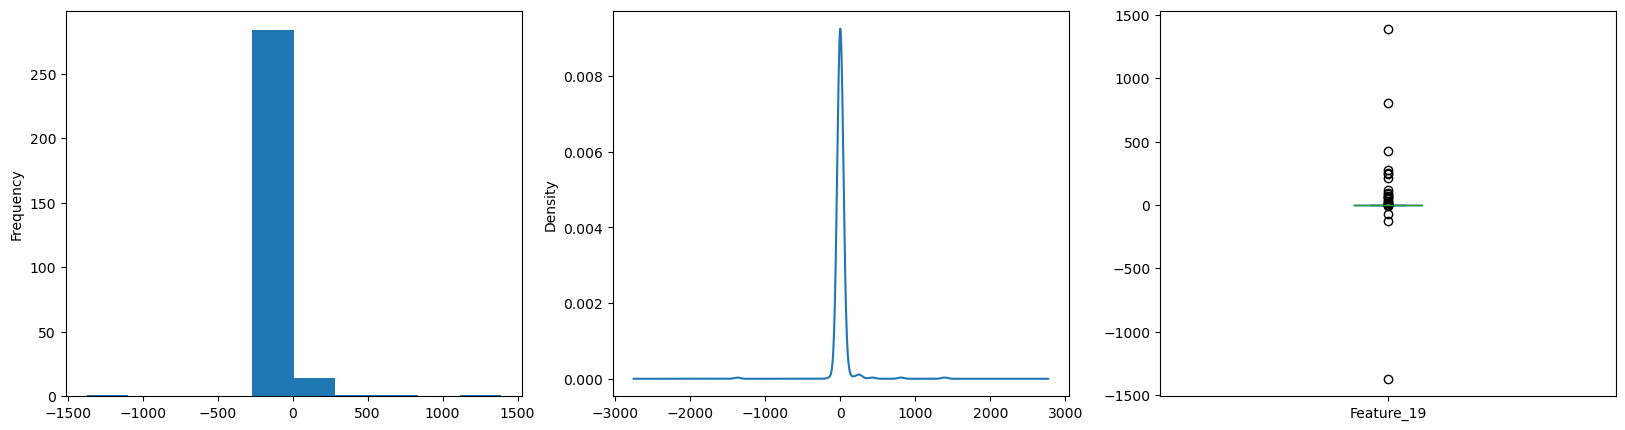

In [9]:
display_features('Feature_19')

We have almost all the value around 0, so we will use the mode.

In [10]:
mode = df_dropped['Feature_19'].mode()
df_dropped.loc[df_dropped['Feature_19'].isna(), 'Feature_19'] = int(mode)

* We will check Features 20

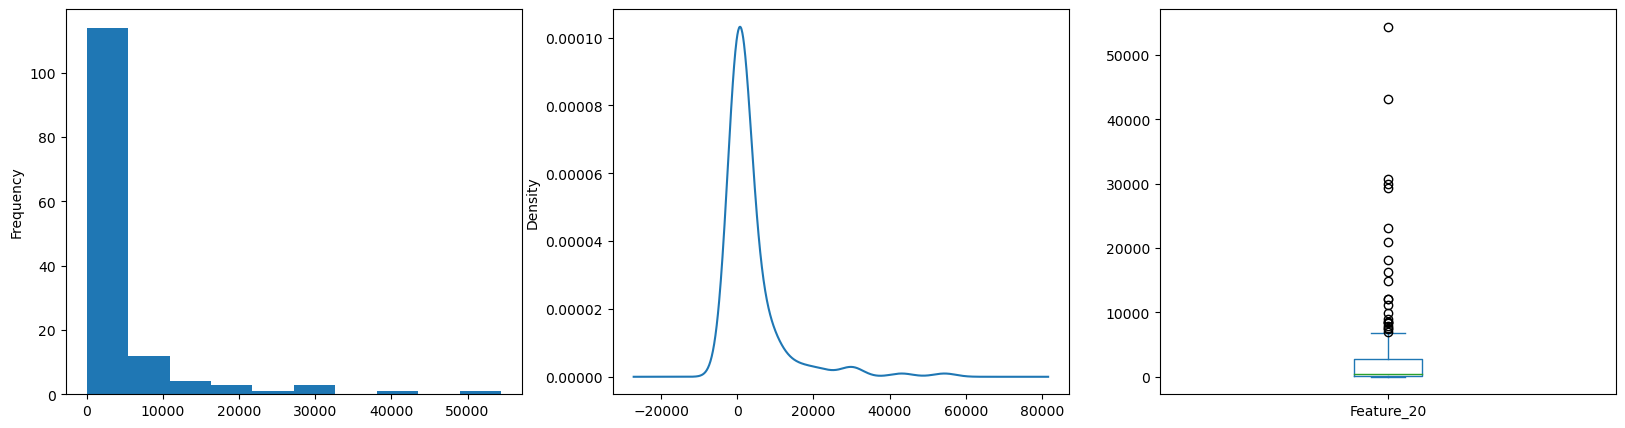

In [11]:
display_features('Feature_20')

We will use the mean.

In [12]:
mean = df_dropped['Feature_20'].mean()
df_dropped.loc[df_dropped['Feature_20'].isna(), 'Feature_20'] = int(mean)

* We will check Features 22

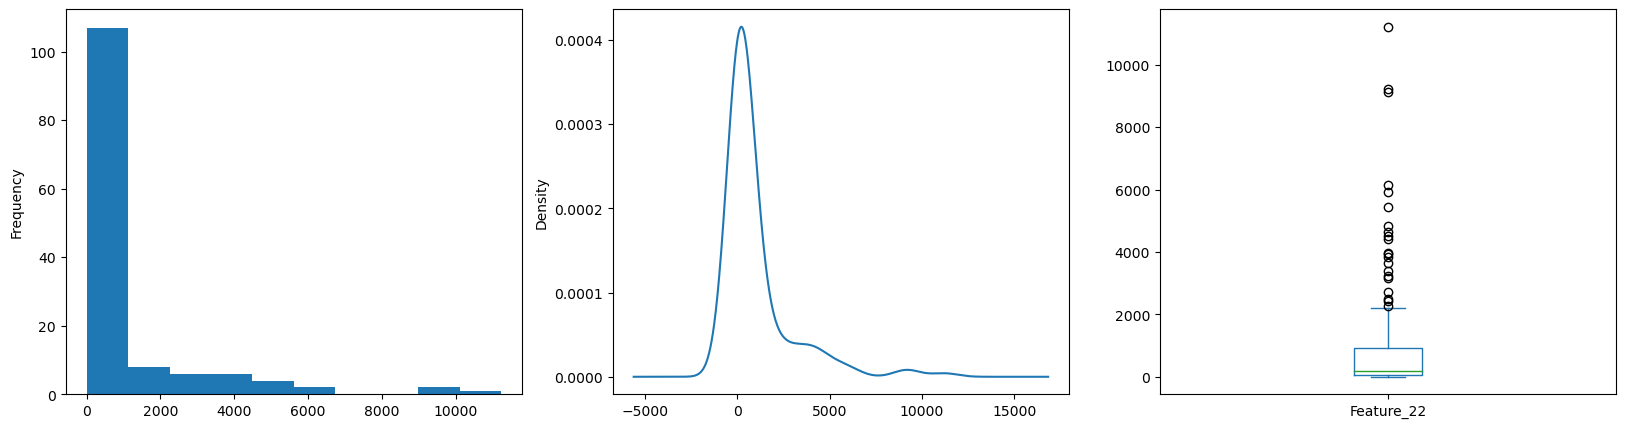

In [13]:
display_features('Feature_22')

We will use the mean.

In [14]:
mean = df_dropped['Feature_22'].mean()
df_dropped.loc[df_dropped['Feature_22'].isna(), 'Feature_22'] = int(mean)

* We will check Features 23

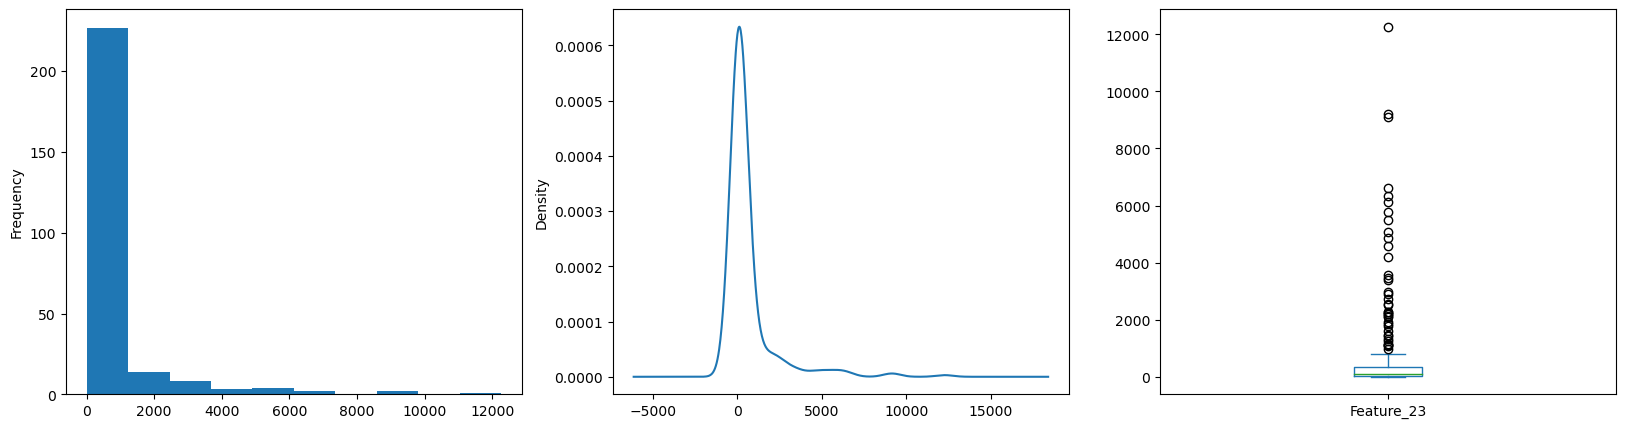

In [15]:
display_features('Feature_23')

We will use the mean.

In [16]:
mean = df_dropped['Feature_23'].mean()
df_dropped.loc[df_dropped['Feature_23'].isna(), 'Feature_23'] = int(mean)

## 3. EDA

We will have a look to the descriptive feature

Text(0.5, 1.0, 'Feature_1')

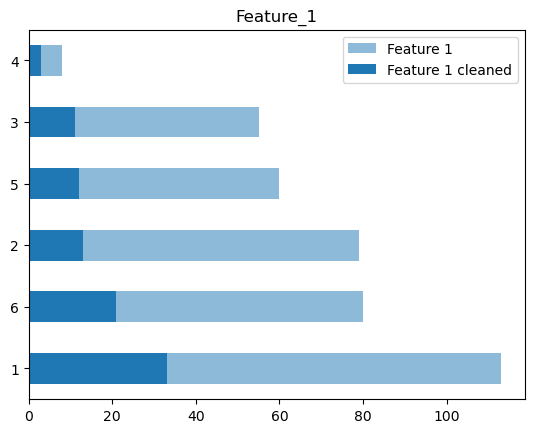

In [17]:
df['Feature_1'].value_counts().plot(kind='barh', alpha=0.5,  label='Feature 1')
df_dropped['Feature_1'].value_counts().plot(kind='barh', label='Feature 1 cleaned')
plt.legend(loc='upper right')
plt.title('Feature_1')

Text(0.5, 1.0, 'Feature_2')

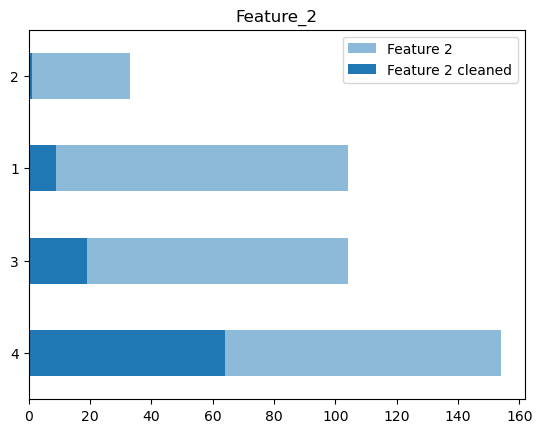

In [18]:
df['Feature_2'].value_counts().plot(kind='barh', alpha=0.5,  label='Feature 2')
df_dropped['Feature_2'].value_counts().plot(kind='barh', label='Feature 2 cleaned')
plt.legend(loc='upper right')
plt.title('Feature_2')

Text(0.5, 1.0, 'Feature_3')

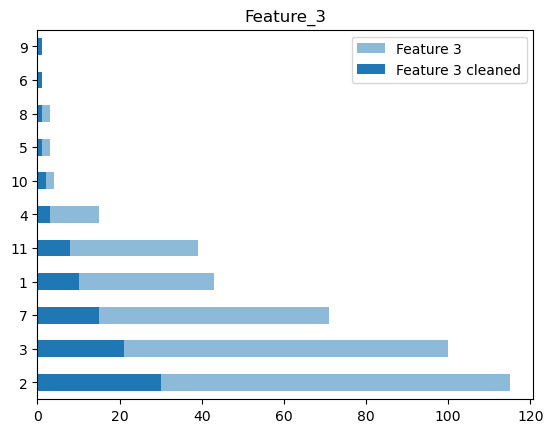

In [19]:
df['Feature_3'].value_counts().plot(kind='barh', alpha=0.5,  label='Feature 3')
df_dropped['Feature_3'].value_counts().plot(kind='barh', label='Feature 3 cleaned')
plt.legend(loc='upper right')
plt.title('Feature_3')

Text(0.5, 1.0, 'Feature_4')

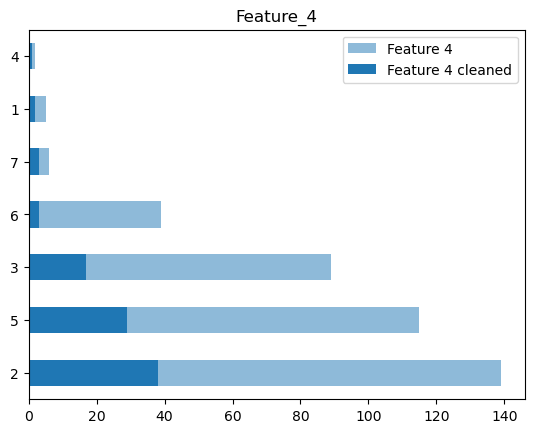

In [20]:
df['Feature_4'].value_counts().plot(kind='barh', alpha=0.5,  label='Feature 4')
df_dropped['Feature_4'].value_counts().plot(kind='barh', label='Feature 4 cleaned')
plt.legend(loc='upper right')
plt.title('Feature_4')

As we can see, the proportion between the raw dataframe and the cleaned one remains the same

In [21]:
df_dropped.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_8,Feature_9,Feature_18,Feature_19,Feature_20,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Output
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.118280,3.483871,4.150538,3.408602,71.430108,27.462366,80.935484,8.118280,5010.086022,1360.763441,1289.709677,0.795699,0.763441,77.774194,0.698925,79.741935,1345.290323
std,2.042215,0.927982,3.082017,1.555052,101.333114,55.136305,4.180198,176.877558,9157.686905,2105.491533,2233.478320,0.405375,0.427273,135.032857,0.461212,196.499580,722.103623
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,68.000000,-1373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,246.000000
25%,1.000000,3.000000,2.000000,2.000000,0.000000,0.000000,80.000000,0.000000,203.000000,93.000000,59.000000,1.000000,1.000000,1.000000,0.000000,0.000000,834.000000
50%,3.000000,4.000000,3.000000,3.000000,32.000000,7.000000,82.000000,0.000000,1375.000000,538.000000,300.000000,1.000000,1.000000,22.000000,1.000000,11.000000,1193.000000
75%,5.000000,4.000000,7.000000,5.000000,118.000000,35.000000,83.000000,0.000000,5010.000000,1360.000000,1327.000000,1.000000,1.000000,101.000000,1.000000,79.000000,1795.000000
max,6.000000,4.000000,11.000000,7.000000,520.000000,327.000000,90.000000,808.000000,54400.000000,11221.000000,12263.000000,1.000000,1.000000,922.000000,1.000000,1634.000000,3629.000000


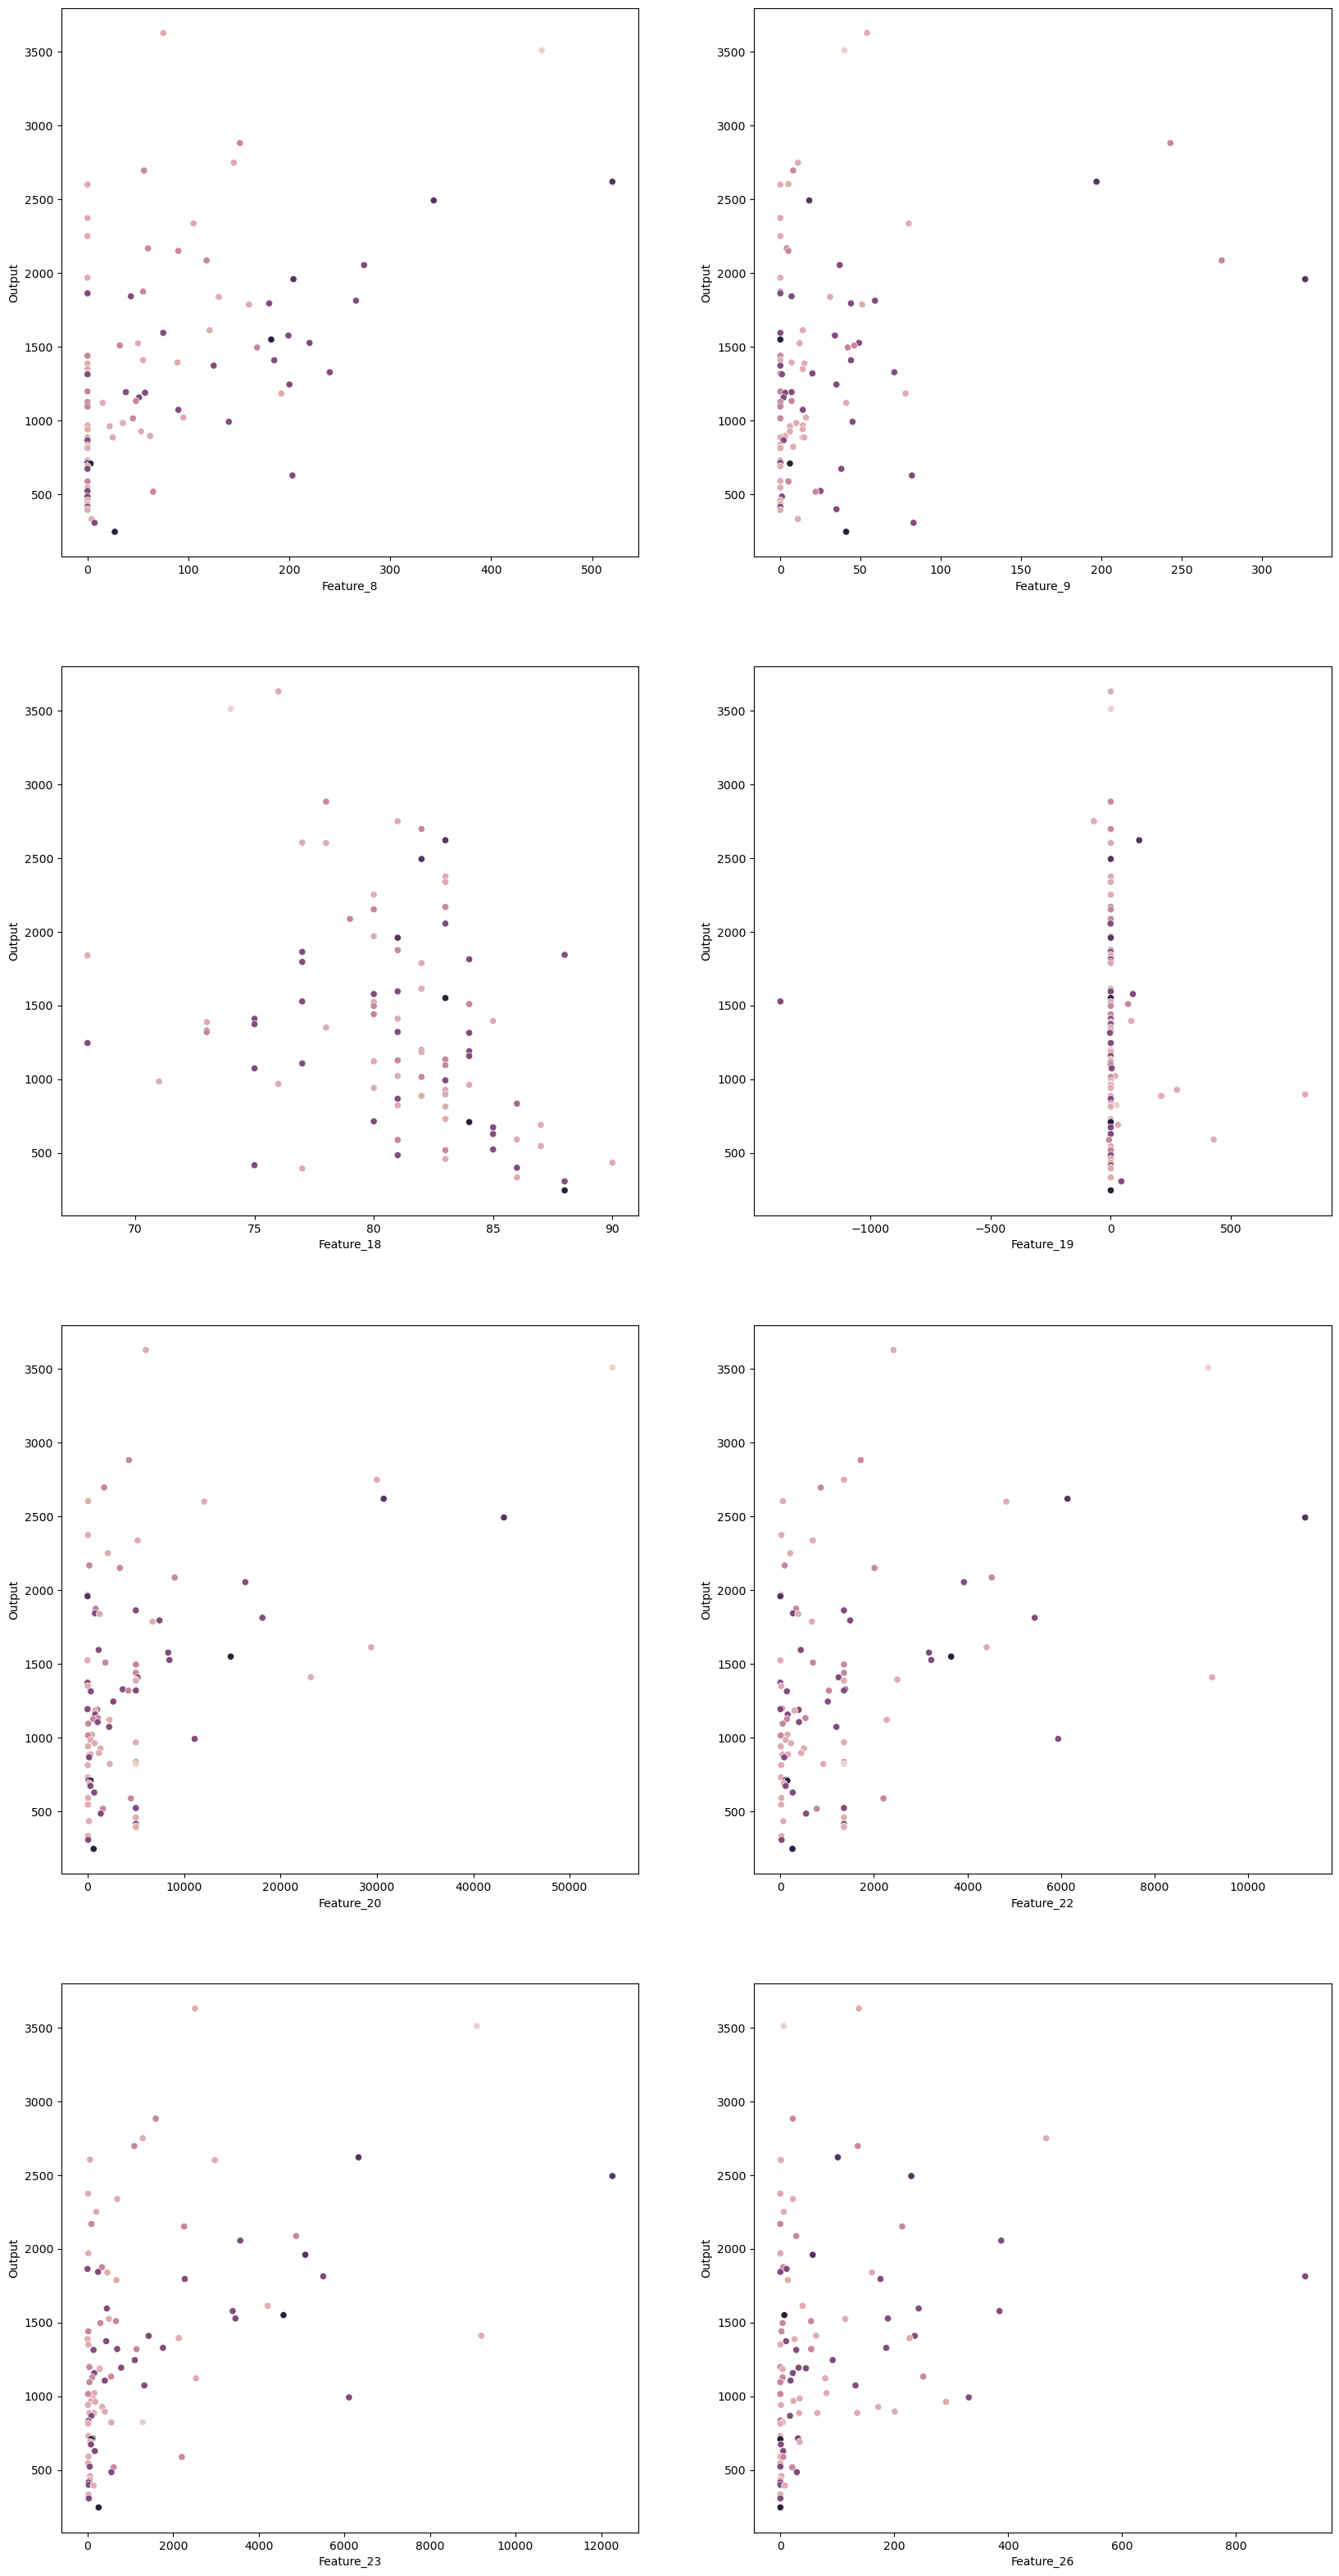

In [22]:
fig,ax = plt.subplots(4,2,figsize=(20,40))
col = row = 0
for n,i in enumerate(['Feature_8', 'Feature_9', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_22', 'Feature_23', 'Feature_26']):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.scatterplot(data=df_dropped, x=i, y='Output', hue='Feature_4',ax=ax[row,col], legend = False)
    col += 1

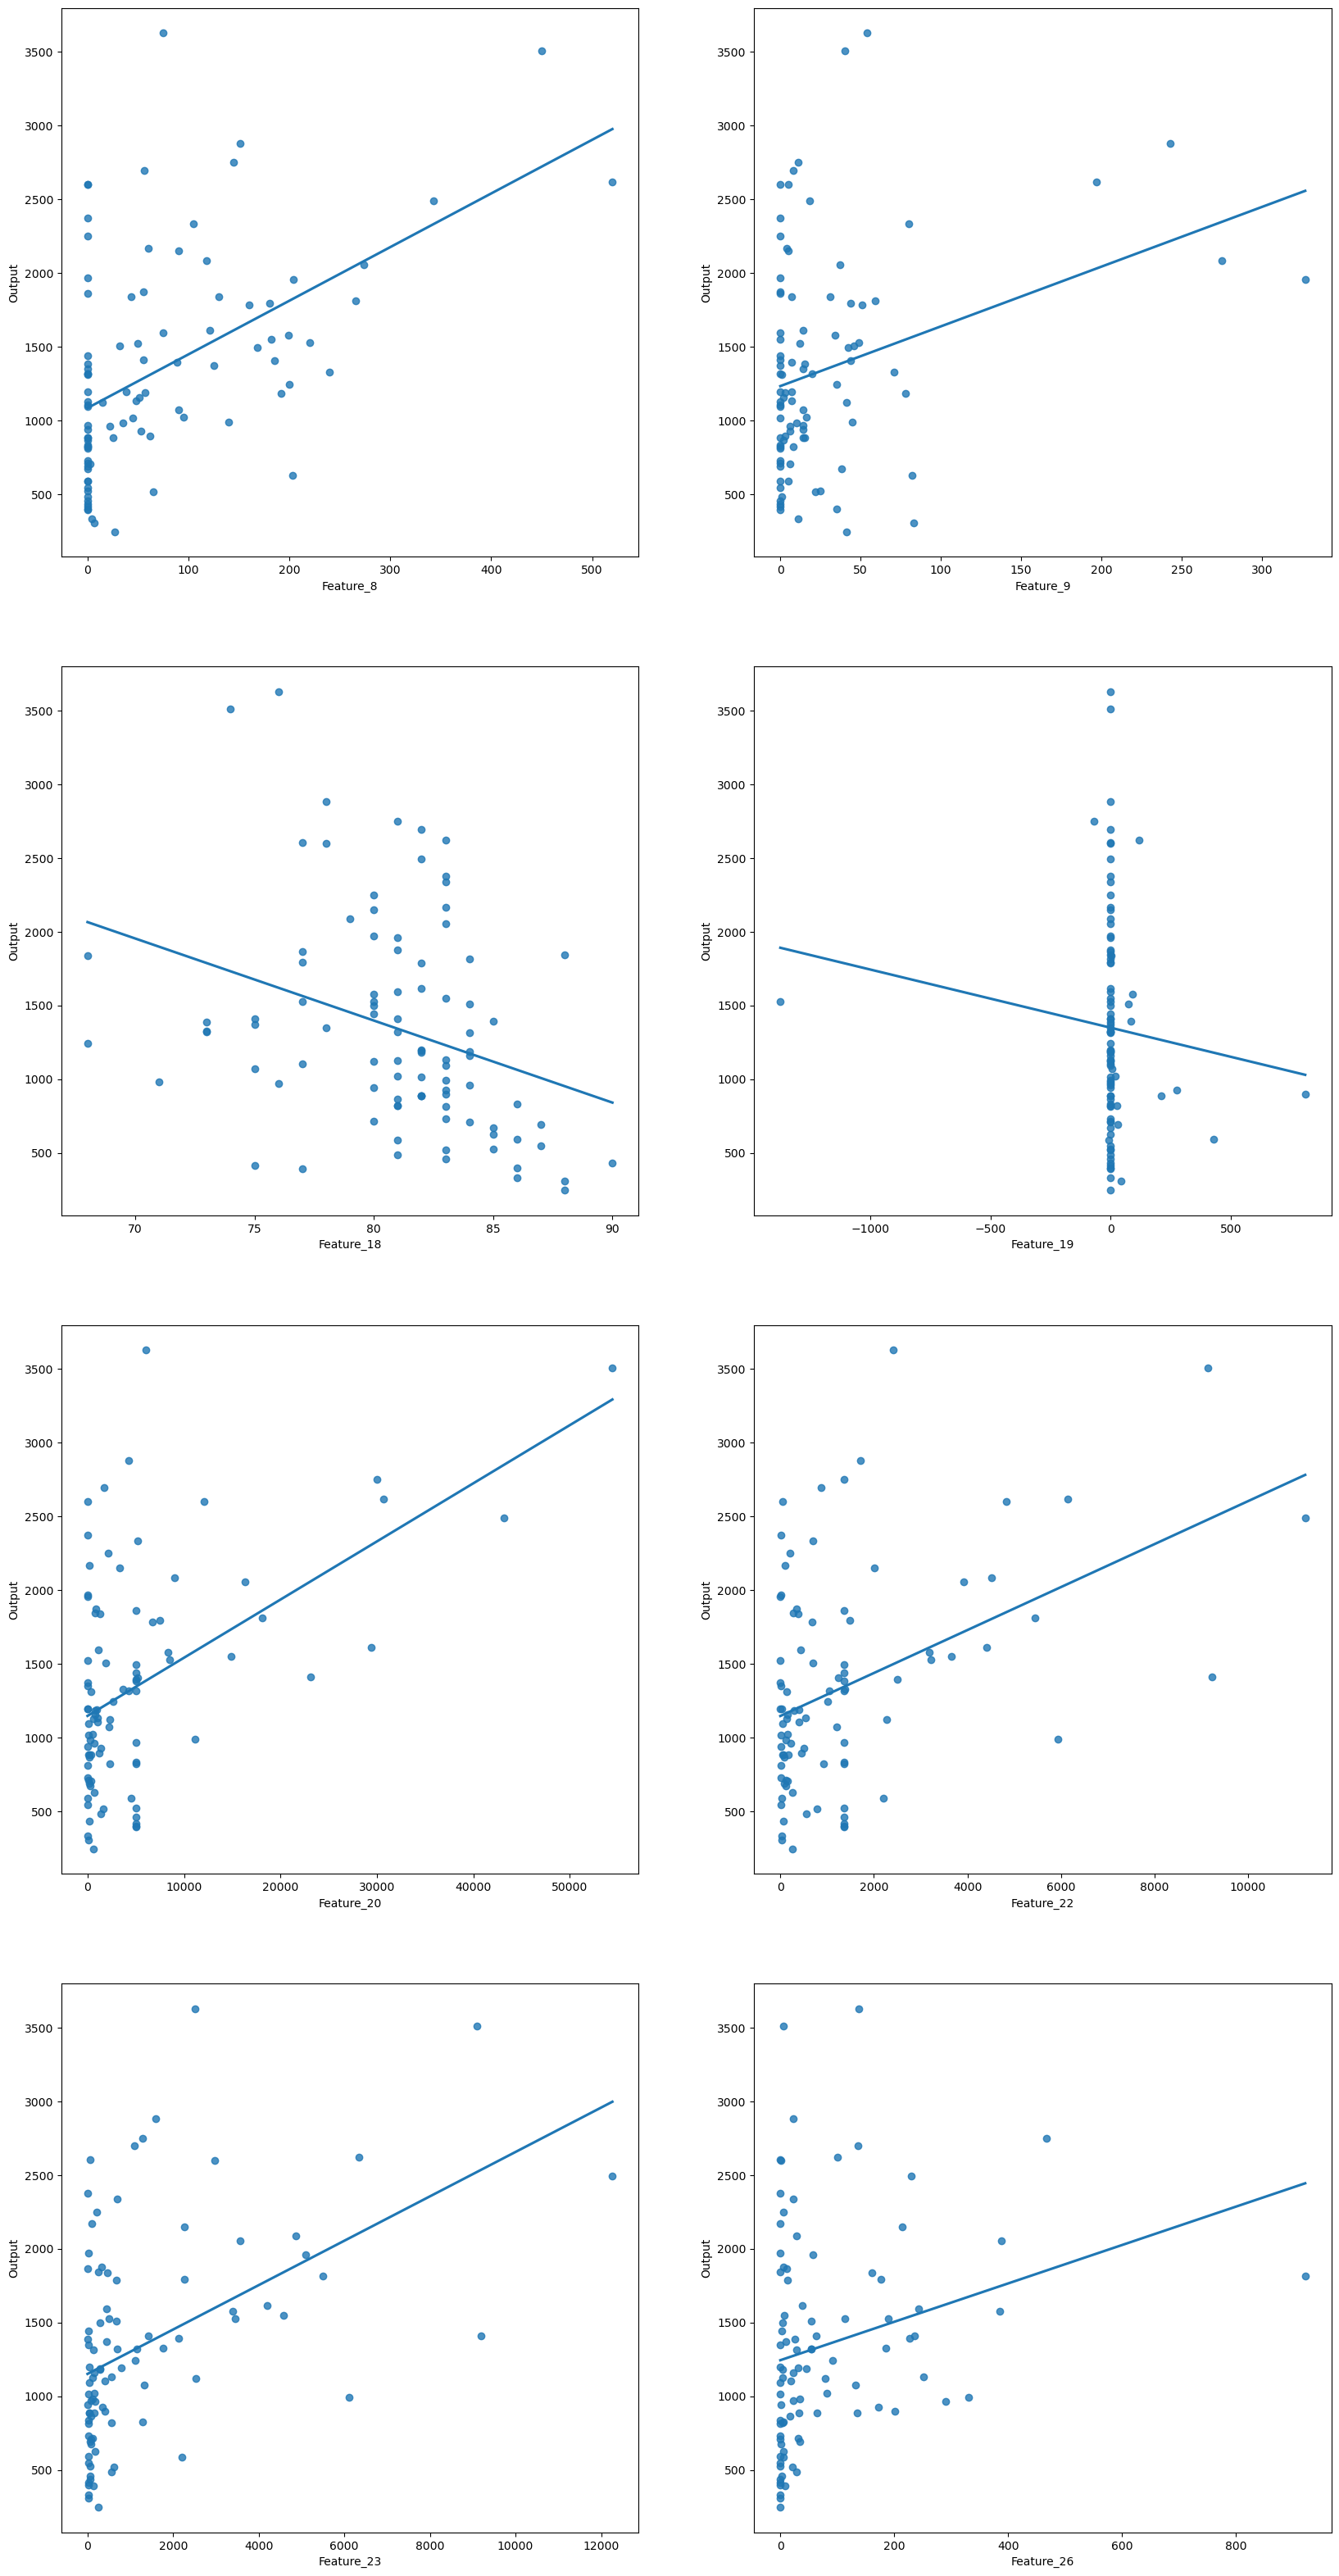

In [23]:
fig,ax = plt.subplots(4,2,figsize=(20,40))
col = row = 0
for n,i in enumerate(['Feature_8', 'Feature_9', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_22', 'Feature_23', 'Feature_26']):
    if (n%2 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y='Output',data=df_dropped,ax=ax[row,col],ci=False)
    col += 1

There isn't no clear pattern of this figure. Use a log on some feature coul help

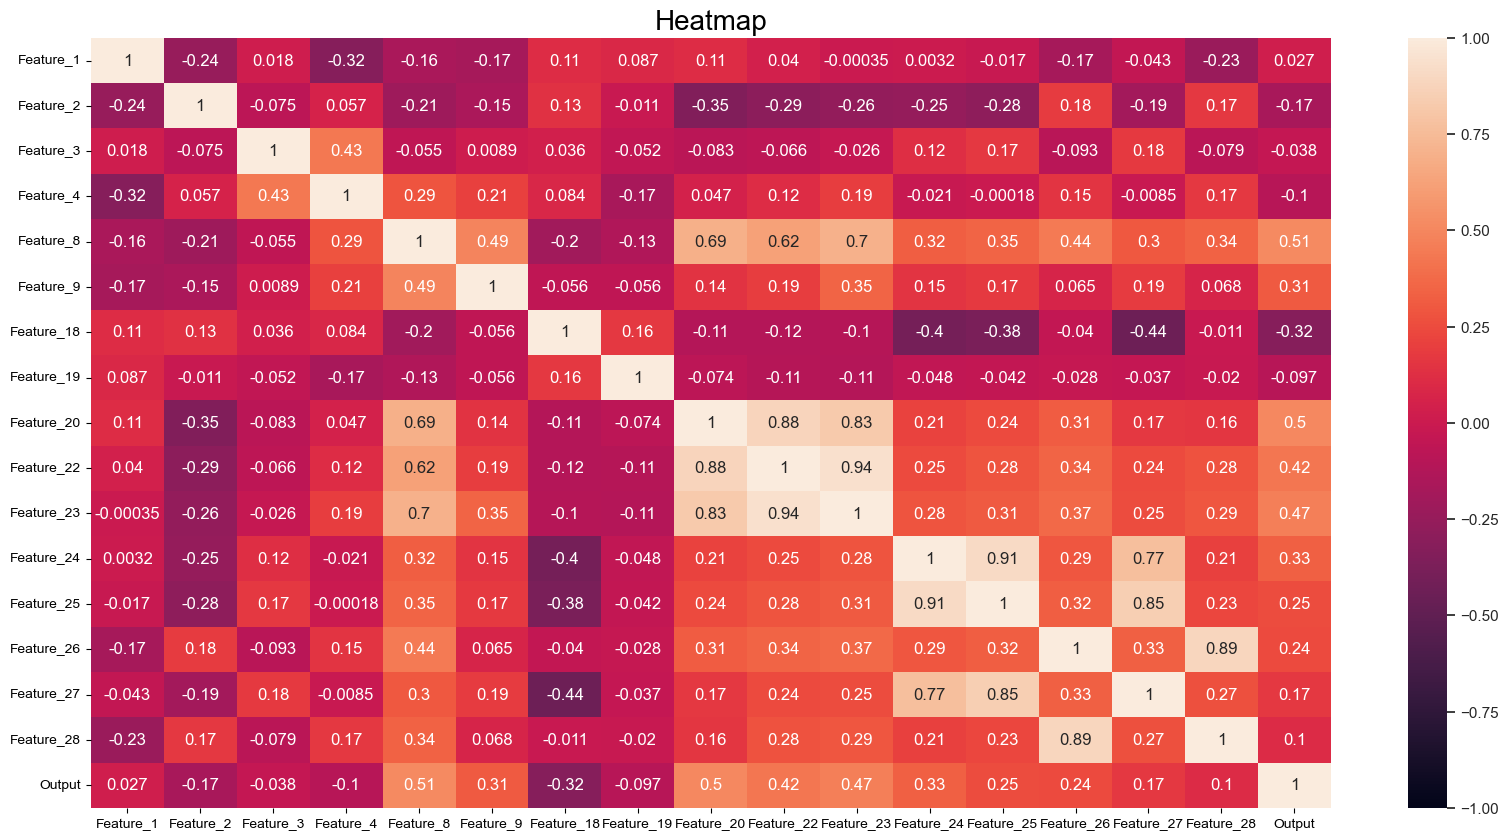

In [24]:
plt.figure(figsize=(20, 10))
corr = df_dropped.corr()

ax = plt.axes()
sns.set(rc = {'figure.figsize':(20, 10)})
sns.heatmap(corr, vmin = -1, vmax = 1, ax = ax, annot = True)

ax.set_title('Heatmap', fontsize = 20)
plt.show()

We can see there is a lot of feature they are correlated together. These features could be removed later on

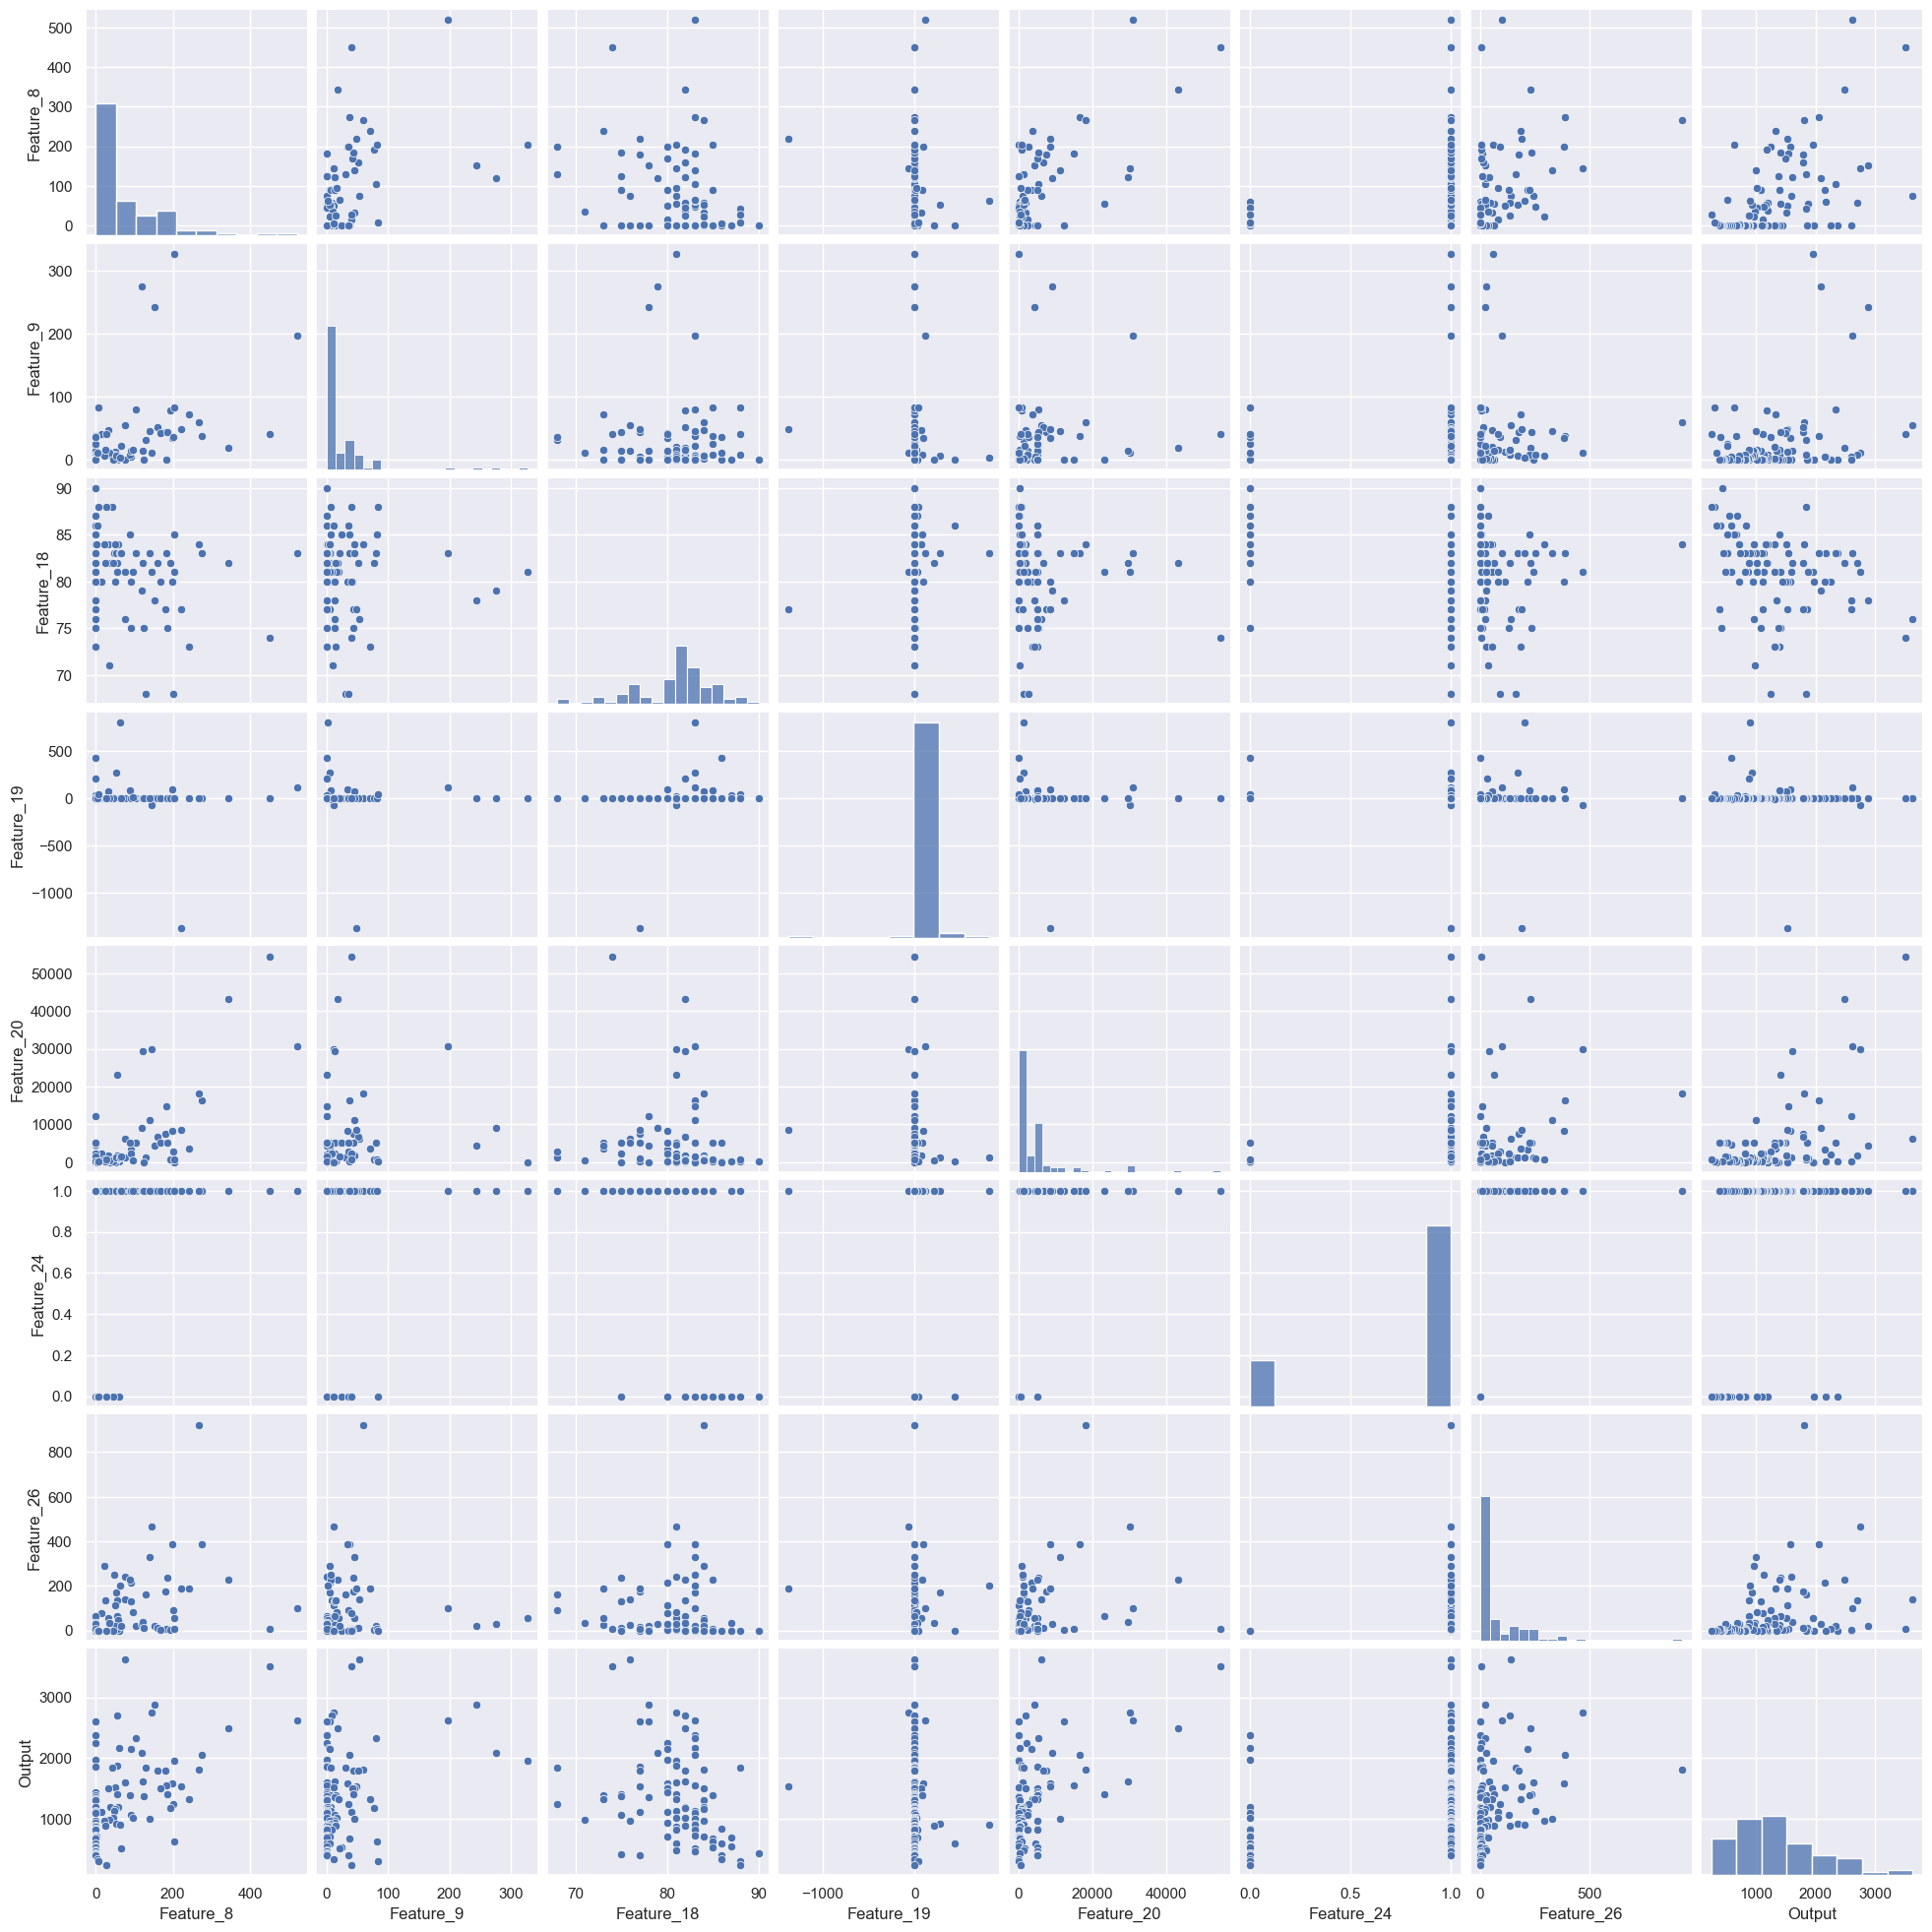

In [25]:
feature_w_o_correlated = ['Feature_8', 'Feature_9', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_24', 'Feature_26', 'Output']
sns.pairplot(df_dropped[feature_w_o_correlated])

### 3. EDA Conclusion

We couldn't found a clear pattern on our data but we will be able to remove some feature there are correlated together. Also, after removed these correlated feature, we could use the log of these to go further.

## 4. Linear Regression

### 4.1 Linear Regression

We will perform a Multiple Linear Regression with the feature there are not correlation.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df_dropped, df_dropped['Output'], test_size=0.3)
#allowed_factors = ['Feature_8', 'Feature_9', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28']
allowed_factors = ['Feature_8', 'Feature_9', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_24', 'Feature_26']

In [27]:
def find_best(df, liste, printed = False):
    best = ['',0]
    for p in liste:
        model  = smf.ols(formula='Output ~'+p, data=df).fit()
        
        if printed:
            print(p, model.rsquared)
        if model.rsquared>best[1]:
            best = [p, model.rsquared]
        
    return best

In [28]:
best = find_best(X_train, allowed_factors, True)
print('best:',best)

adjr2_train = []
adjr2_test = []

x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((x, np.ones(x.shape[0])))
train_1 = smf.ols(formula='Output ~' + best[0], data=X_train).fit()

print(train_1.summary())

x_test = X_test[best[0]]
y_test = X_test['Output'] 

yhat = train_1.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)

print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_1.rsquared)
adjr2_test.append(adjusted_r_squared)

Feature_8 0.18438464007107103
Feature_9 0.10681095533500329
Feature_18 0.1011365879316235
Feature_19 0.0007137914440916715
Feature_20 0.12980646487918568
Feature_24 0.10499678235349541
Feature_26 0.04897212579670729
best: ['Feature_8', 0.18438464007107103]
                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     14.24
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000358
Time:                        20:06:28   Log-Likelihood:                -514.44
No. Observations:                  65   AIC:                             1033.
Df Residuals:                      63   BIC:                             1037.
Df Model:                           1                                         
Covariance Type:            nonr

In [29]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_9 0.10681095533500329
Feature_18 0.1011365879316235
Feature_19 0.0007137914440916715
Feature_20 0.12980646487918568
Feature_24 0.10499678235349541
Feature_26 0.04897212579670729
best: ['Feature_20', 0.12980646487918568]


In [30]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_2 = sm.OLS(y, X).fit()

print(train_2.summary())

x_test = np.column_stack((x_test, np.ones(x_test.shape[0])))
x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_2.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)

print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_2.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     7.533
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00118
Time:                        20:06:28   Log-Likelihood:                -513.99
No. Observations:                  65   AIC:                             1034.
Df Residuals:                      62   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.4646      1.095      2.250      0.0

In [31]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_9 0.10681095533500329
Feature_18 0.1011365879316235
Feature_19 0.0007137914440916715
Feature_24 0.10499678235349541
Feature_26 0.04897212579670729
best: ['Feature_9', 0.10681095533500329]


In [32]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_3 = sm.OLS(y, X).fit()

print(train_3.summary())

x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_3.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)

print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_3.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.630
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00179
Time:                        20:06:28   Log-Likelihood:                -513.12
No. Observations:                  65   AIC:                             1034.
Df Residuals:                      61   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5760      1.289      1.222      0.2

In [33]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_18 0.1011365879316235
Feature_19 0.0007137914440916715
Feature_24 0.10499678235349541
Feature_26 0.04897212579670729
best: ['Feature_24', 0.10499678235349541]


In [34]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_4 = sm.OLS(y, X).fit()

print(train_4.summary())

x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_4.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)


print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_4.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     5.135
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00126
Time:                        20:06:28   Log-Likelihood:                -511.50
No. Observations:                  65   AIC:                             1033.
Df Residuals:                      60   BIC:                             1044.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0042      1.309      0.767      0.4

In [35]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_18 0.1011365879316235
Feature_19 0.0007137914440916715
Feature_26 0.04897212579670729
best: ['Feature_18', 0.1011365879316235]


In [36]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_5 = sm.OLS(y, X).fit()

print(train_5.summary())

x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_5.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)


print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_5.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     4.984
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000713
Time:                        20:06:28   Log-Likelihood:                -509.61
No. Observations:                  65   AIC:                             1031.
Df Residuals:                      59   BIC:                             1044.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3826      1.325      0.289      0.7

In [37]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_19 0.0007137914440916715
Feature_26 0.04897212579670729
best: ['Feature_26', 0.04897212579670729]


In [38]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_5 = sm.OLS(y, X).fit()

print(train_5.summary())

x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_5.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)


print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_5.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.099
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00170
Time:                        20:06:28   Log-Likelihood:                -509.58
No. Observations:                  65   AIC:                             1033.
Df Residuals:                      58   BIC:                             1048.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2365      1.449      0.163      0.8

In [39]:
allowed_factors.remove(best[0])
best = find_best(X_train, allowed_factors, True)
print('best:',best)

Feature_19 0.0007137914440916715
best: ['Feature_19', 0.0007137914440916715]


In [40]:
x = X_train[best[0]]
y = X_train['Output']

X = np.column_stack((X, X_train[best[0]]))
train_5 = sm.OLS(y, X).fit()

print(train_5.summary())

x_test = np.column_stack((x_test, X_test[best[0]]))

yhat = train_5.predict(x_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-2)


print('r_squared : ',r_squared)
print('adjusted_r_squared : ', adjusted_r_squared)

adjr2_train.append(train_5.rsquared)
adjr2_test.append(adjusted_r_squared)

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.470
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00365
Time:                        20:06:28   Log-Likelihood:                -509.53
No. Observations:                  65   AIC:                             1035.
Df Residuals:                      57   BIC:                             1052.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2923      1.473      0.198      0.8

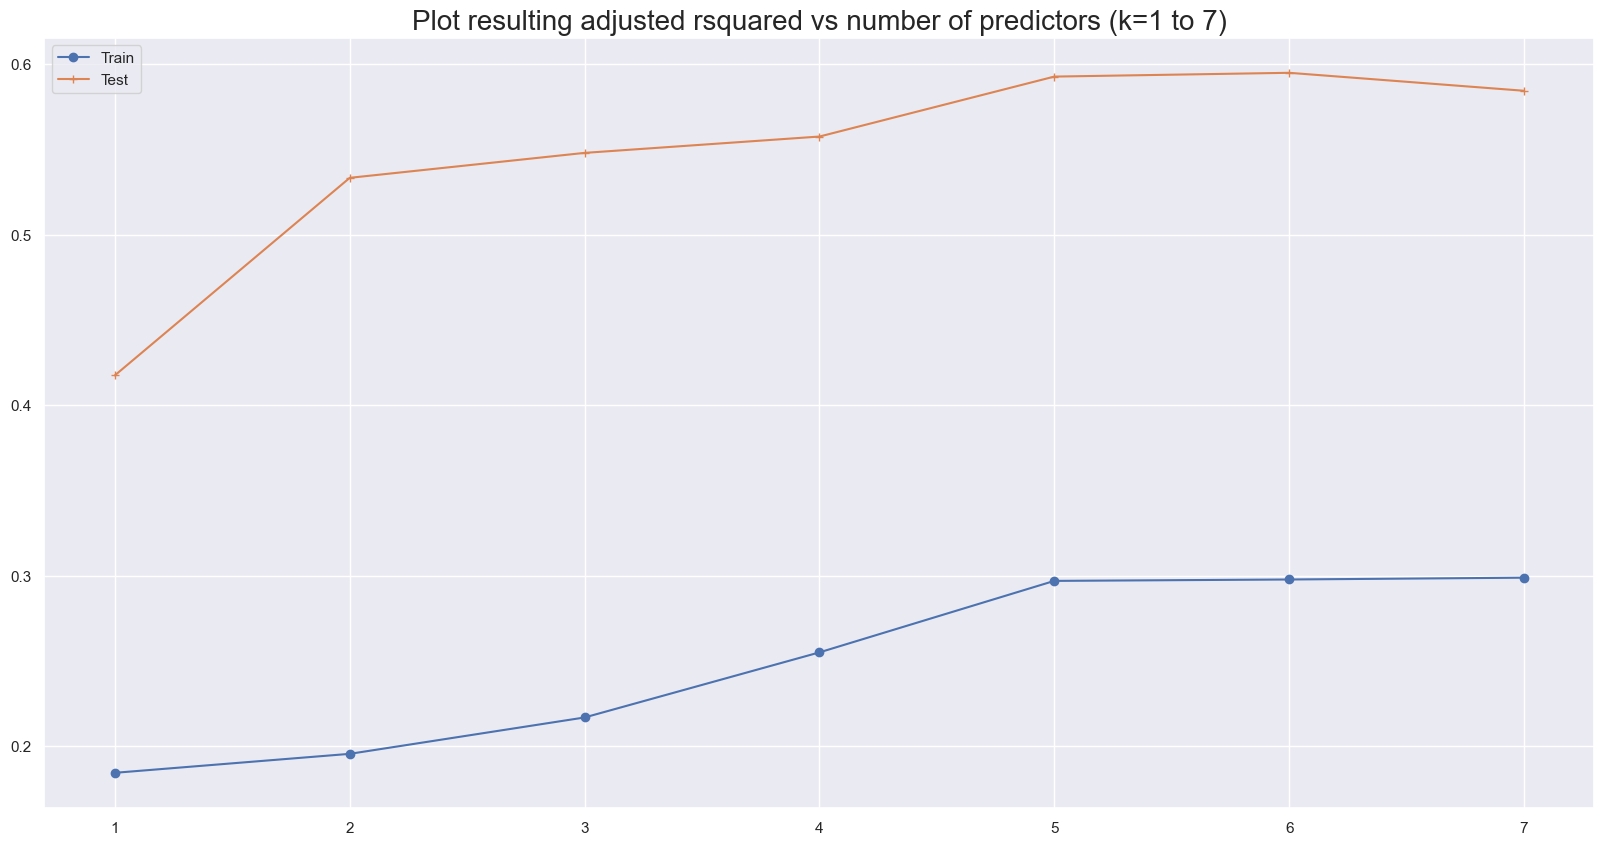

In [41]:
predictor = pd.Series(range(1,8))
plt.plot(predictor, adjr2_train, marker="o", label="Train")
plt.plot(predictor, adjr2_test, marker="+", label="Test")
plt.title('Plot resulting adjusted rsquared vs number of predictors (k=1 to 7)', fontsize = 20)
plt.legend()

We will use the three first feature to improve our prediction

In [45]:
# uncomment and construct a multi-linear model 
mod =  smf.ols(formula='Output ~ Feature_8 + Feature_20 + Feature_9', data=X_train)
model = mod.fit()
# your code here
print(model.summary())

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Output ~ Feature_8 + Feature_20 + Feature_9', data=X_train, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     5.630
Date:                Mon, 10 Oct 2022   Prob (F-statistic):            0.00179
Time:                        20:09:16   Log-Likelihood:                -513.12
No. Observations:                  65   AIC:                             1034.
Df Residuals:                      61   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1109.3299    103.433     10.725      0.0

,VIF,variable
0,1.550082,Intercept
1,2.441683,Feature_8
2,1.837252,Feature_20
3,1.457772,Feature_9


As we can see the feature have a VIF close to 1, means the aren't correlated. But the P-Value is too high, and not significant

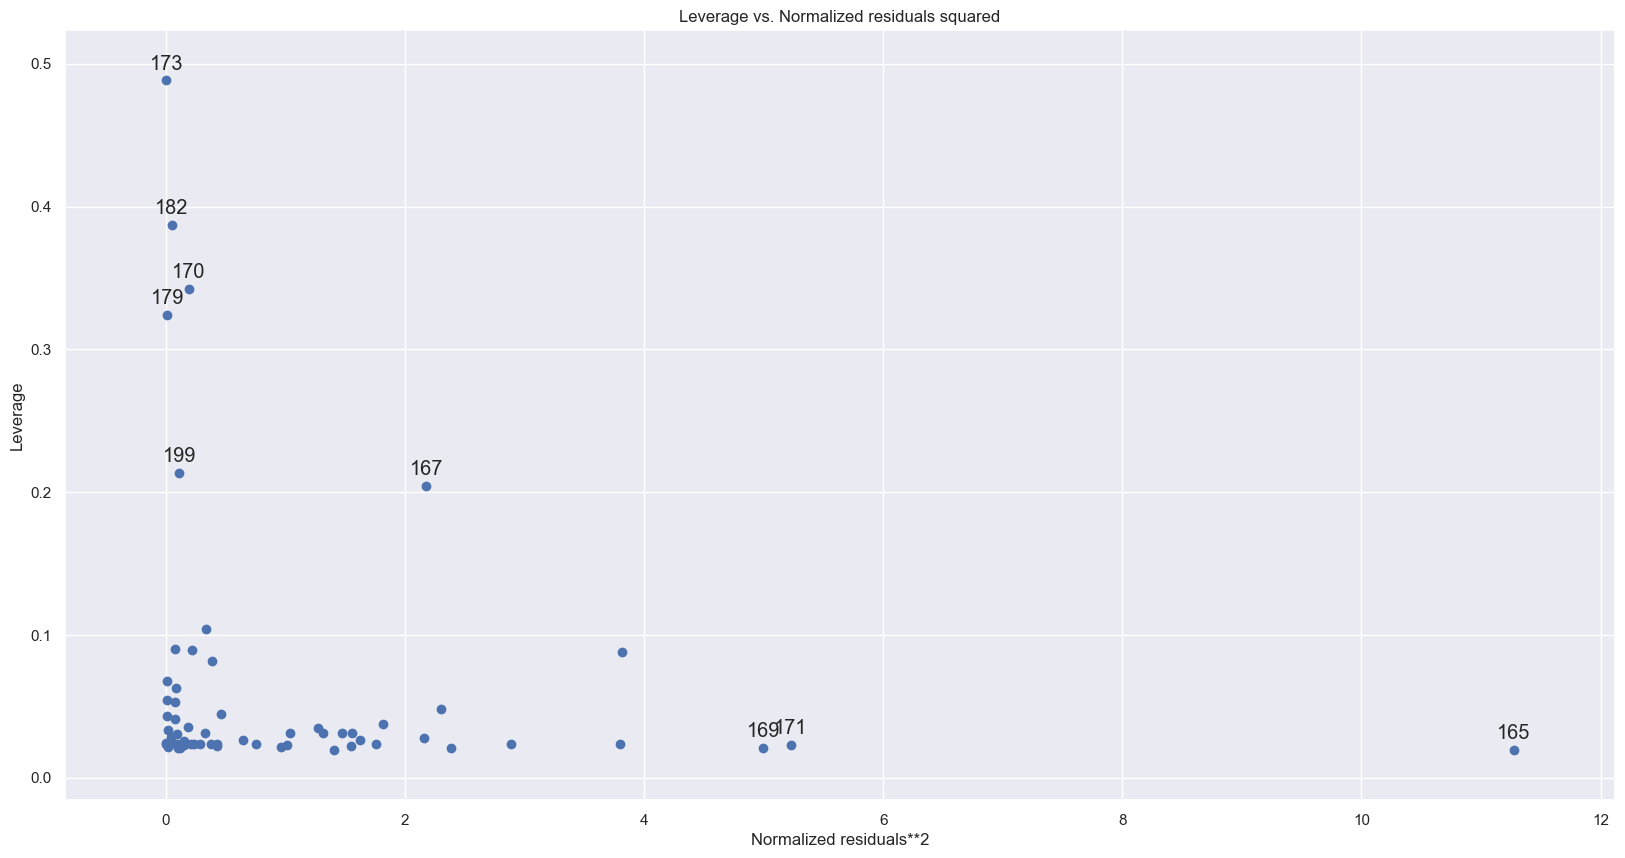

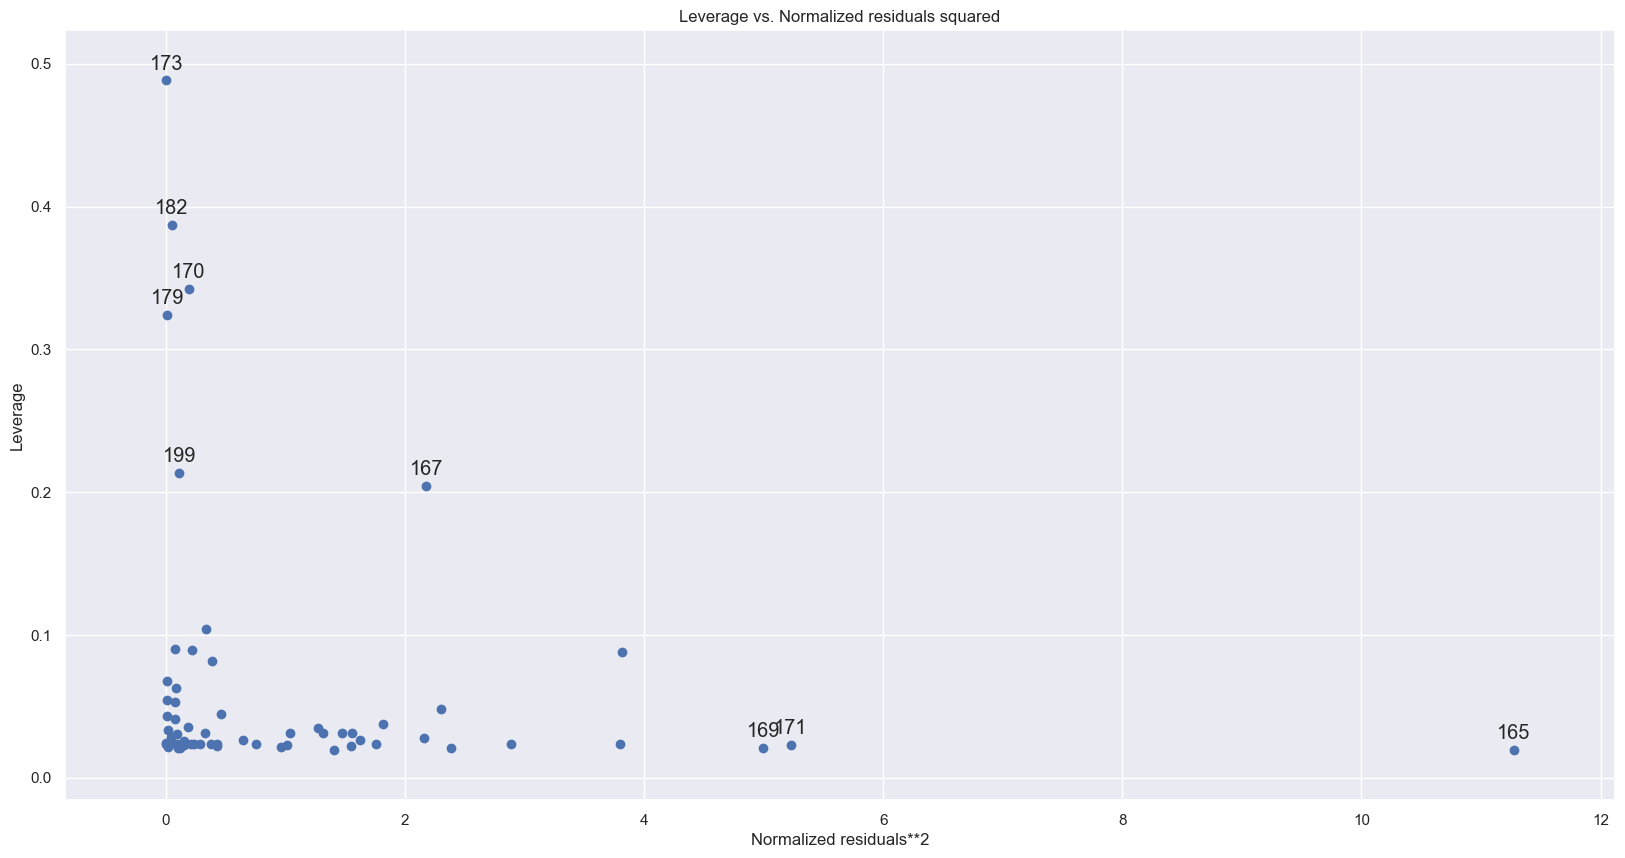

In [46]:
sm.graphics.plot_leverage_resid2(model)

In [47]:
unusual = [173, 165, 171, 169]

                            OLS Regression Results                            
Dep. Variable:                 Output   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     7.179
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           0.000360
Time:                        20:11:34   Log-Likelihood:                -470.48
No. Observations:                  61   AIC:                             949.0
Df Residuals:                      57   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1016.1020     90.066     11.282      0.0

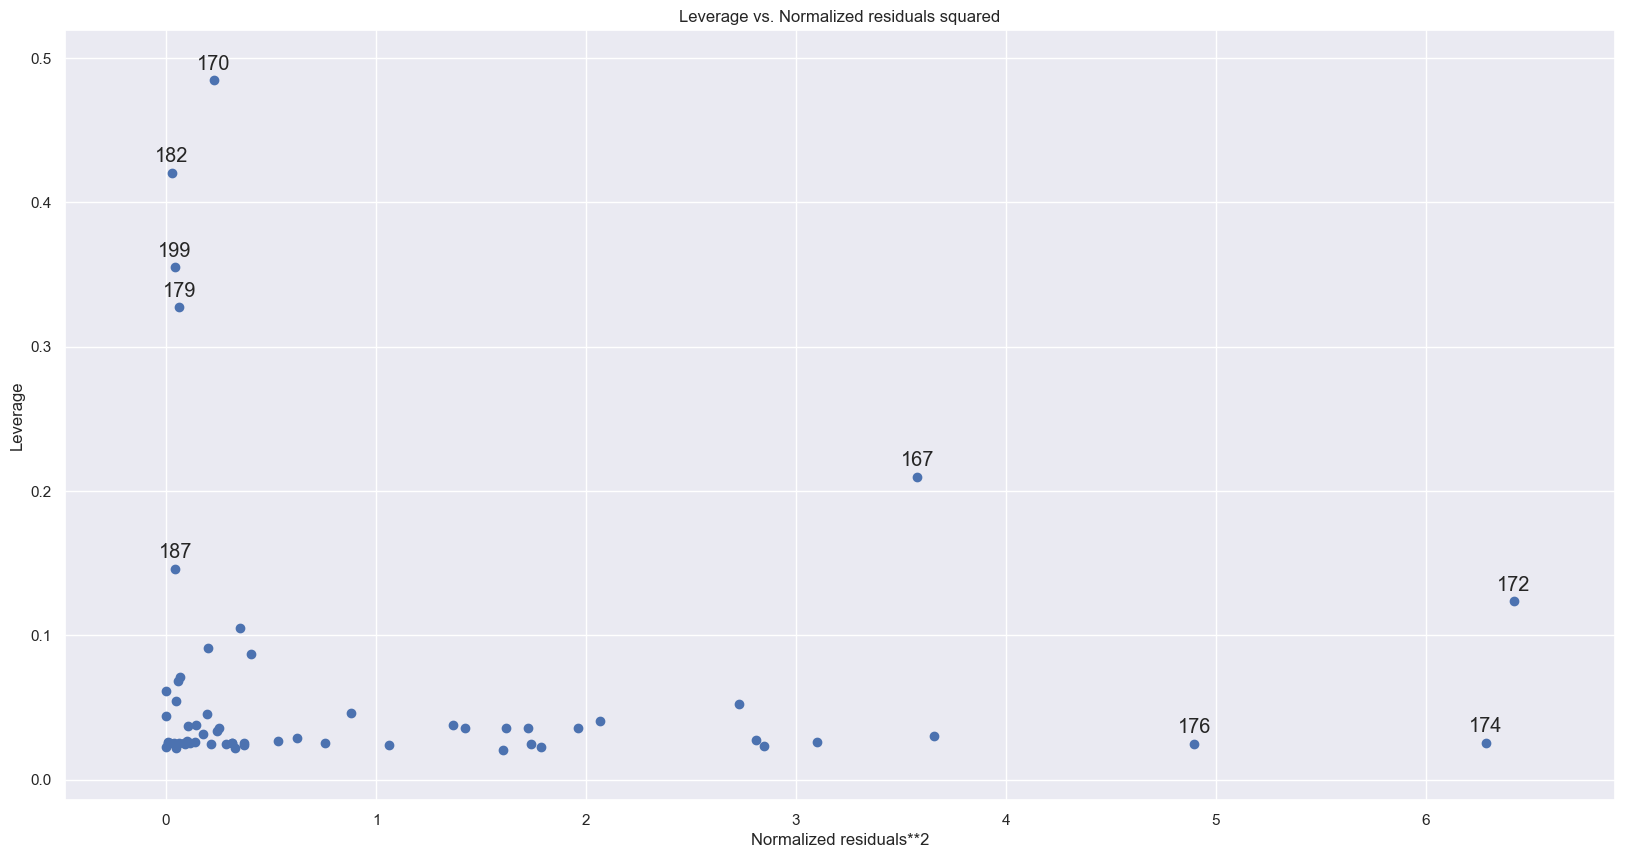

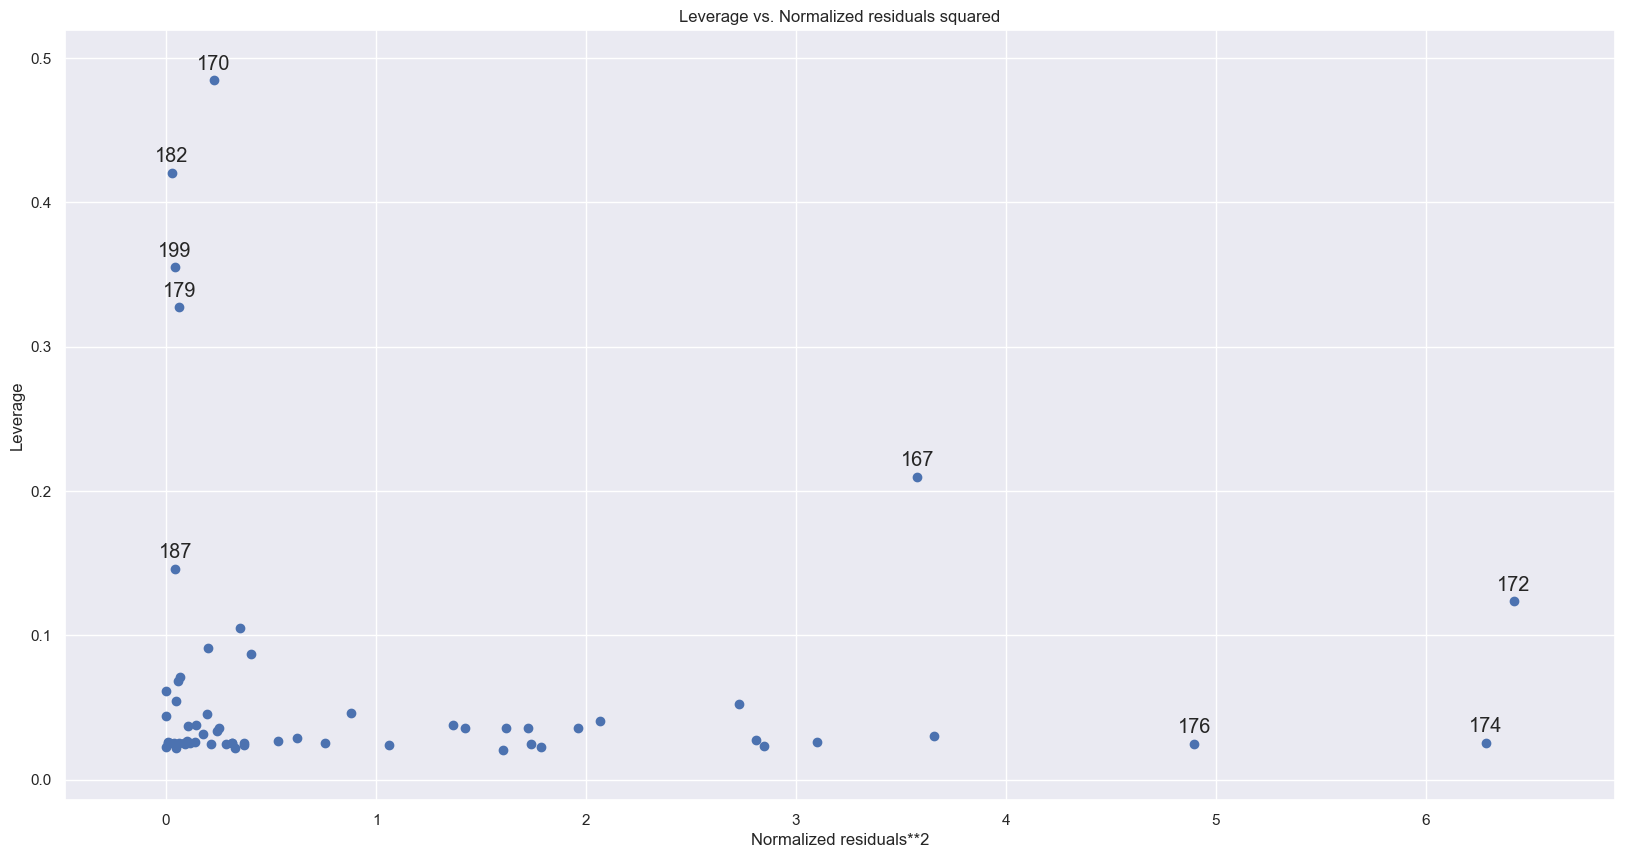

In [48]:
# develop your model_final here
X_train_drop = X_train.drop(index=unusual)

mod =  smf.ols(formula='Output ~ Feature_8 + Feature_20 + Feature_9', data=X_train_drop)
model = mod.fit()
# your code here
print(model.summary())

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Output ~ Feature_8 + Feature_20 + Feature_9', data=X_train_drop, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
print(vif)
sm.graphics.plot_leverage_resid2(model)

We didn't improve the  prediction by this means

## Conclusion

We didin't have enough information to be able to predict the duration of the event with the data we collect. Further investigation, and more features collection could lead to a better prediction.

We have to go deeper in the EDA, first by splitting by categories to see if there are some underlying pattern.